In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
import glob
import re
import csv

In [ ]:
# output_files = glob.glob("imagenet21k_ViT-B_16*output.txt")
output_files = glob.glob("cnn/*.txt")
print(output_files)
model_name = output_files[0].partition("_skin")[0]
csv_file_name = model_name + "_metrics.csv"

hyper_params = [
    "batch_size",
    "epochs",
    "max_stop_count",
    "warmup_steps",
    "decay_type",
    "grad_norm_clip",
    "accum_steps",
    "optimizer_type",
    "base_lr",
    "fixed_learning_rate",
    "learning_rate",
    "scheduler",
    "weight_decay",
]

pattern_true = r"binary skin tone (\d+) true .*:\[(.*?)\]"
pattern_predict = r"binary skin tone (\d+) predicted .*:\[(.*?)\]"
# pattern_true = r"^skin tone (\d+) true .*:\[(.*?)\]"
# pattern_predict = r"^skin tone (\d+) predicted .*:\[(.*?)\]"
pattern_loss = r"validation loss\s*=\s*\[(.*?)\]"


header = [
    "Hyper Parameters",
]

metric_types = [
    "Accuracy",
    "Sensitivity",
    "Specificity",
    "Precision",
    "Score",
    "AUC",
]

for i in range(1, 3):
    for metric in metric_types:
        header.append(f"Skin{i} {metric}")

# for i in range(1, 7):
#     for metric in metric_types:
#         header.append(f"Skin{i} {metric}")

print(header)

print(model_name)
with open(csv_file_name, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)

[]


IndexError: list index out of range

learning_rate = 0.001
weight_decay = 0.0001
scheduler = fixed
max_stop_count = 5
grad_norm_clip = 1


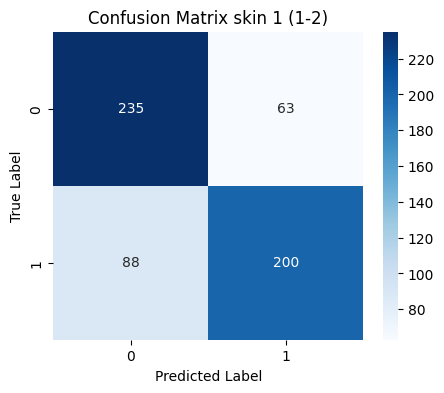

Accuracy: 0.7423
Sensitivity: 0.6944
Specificity: 0.7886
Precision: 0.7605
F1 Score: 0.7260
AUC: 0.7415


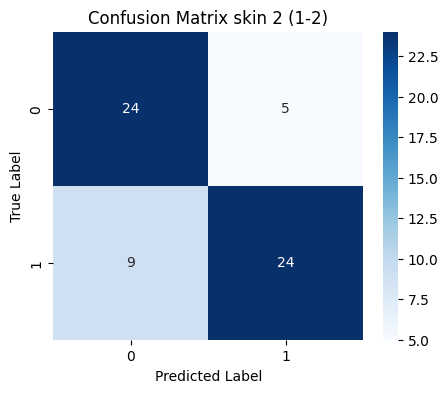

Accuracy: 0.7742
Sensitivity: 0.7273
Specificity: 0.8276
Precision: 0.8276
F1 Score: 0.7742
AUC: 0.7774
['learning_rate = 0.001  weight_decay = 0.0001  scheduler = fixed  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.7423', ' 0.6944', ' 0.7886', ' 0.7605', ' 0.7260', ' 0.7415', ' 0.7742', ' 0.7273', ' 0.8276', ' 0.8276', ' 0.7742', ' 0.7774']
learning_rate = 0.001
weight_decay = 0.0001
scheduler = CosineAnnealingLR
max_stop_count = 5
grad_norm_clip = 1


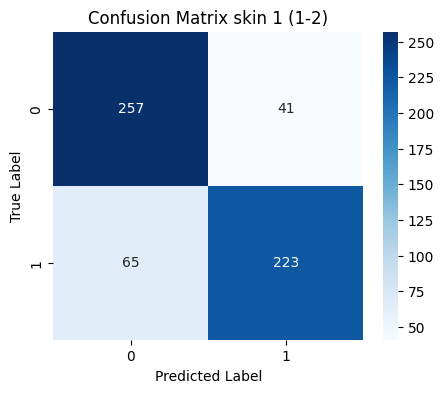

Accuracy: 0.8191
Sensitivity: 0.7743
Specificity: 0.8624
Precision: 0.8447
F1 Score: 0.8080
AUC: 0.8184


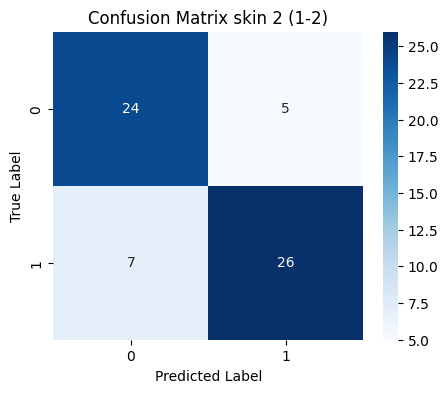

Accuracy: 0.8065
Sensitivity: 0.7879
Specificity: 0.8276
Precision: 0.8387
F1 Score: 0.8125
AUC: 0.8077
['learning_rate = 0.001  weight_decay = 0.0001  scheduler = CosineAnnealingLR  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.8191', ' 0.7743', ' 0.8624', ' 0.8447', ' 0.8080', ' 0.8184', ' 0.8065', ' 0.7879', ' 0.8276', ' 0.8387', ' 0.8125', ' 0.8077']
learning_rate = 0.001
weight_decay = 0.0001
scheduler = fixed
max_stop_count = 5
grad_norm_clip = 1


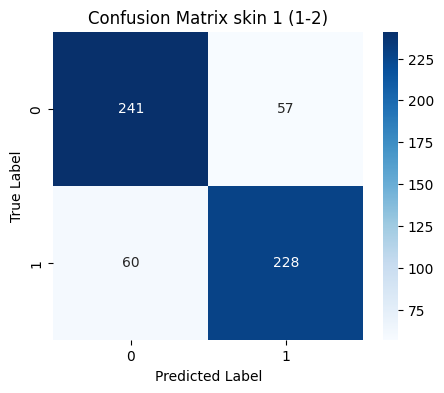

Accuracy: 0.8003
Sensitivity: 0.7917
Specificity: 0.8087
Precision: 0.8000
F1 Score: 0.7958
AUC: 0.8002


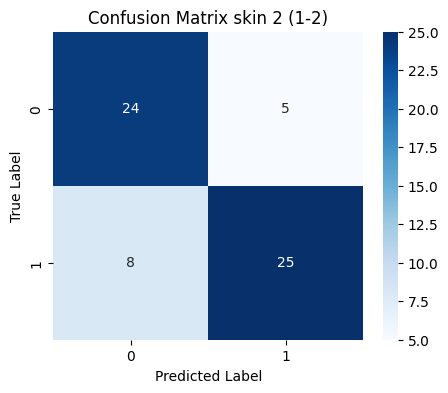

Accuracy: 0.7903
Sensitivity: 0.7576
Specificity: 0.8276
Precision: 0.8333
F1 Score: 0.7937
AUC: 0.7926
['learning_rate = 0.001  weight_decay = 0.0001  scheduler = fixed  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.8003', ' 0.7917', ' 0.8087', ' 0.8000', ' 0.7958', ' 0.8002', ' 0.7903', ' 0.7576', ' 0.8276', ' 0.8333', ' 0.7937', ' 0.7926']


In [ ]:
for file_name in output_files:
    skin_tone = -1
    true_labels = None
    predicted_labels = None

    with open(file_name, "r") as file:
        content = file.read()

    sections = [
        section.strip() for section in content.split("Test output:") if section.strip()
    ]

    for section in sections:
        params = ""
        metrics = []
        for line in section.split("\n"):
            if any(keyword in line for keyword in hyper_params):
                print(line.strip())
                params += line.strip() + "\n"

            match_true = re.search(pattern_true, line)
            if match_true:
                skin_tone = int(match_true.group(1))
                true_labels = list(map(int, match_true.group(2).split(", ")))

            match_predicted = re.search(pattern_predict, line)
            if match_predicted:
                skin_tone = int(match_predicted.group(1))
                predicted_labels = list(map(int, match_predicted.group(2).split(", ")))

            match_loss = re.search(pattern_loss, line)
            if match_loss:
                loss_list = match_loss.group(1).split(", ")
                loss_values = list(map(float, loss_list))
                epochs = list(range(1, len(loss_values) + 1))

                # Plot loss curve
                plt.figure(figsize=(6, 4))
                plt.plot(epochs, loss_values, marker="o", linestyle="-", label="Loss")
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.title("Model Loss per Epoch")
                plt.legend()
                plt.show()
                match_loss = None

            if true_labels and predicted_labels:
                cm = confusion_matrix(true_labels, predicted_labels)
                plt.figure(figsize=(5, 4))
                sns.heatmap(
                    cm,
                    annot=True,
                    fmt="d",
                    cmap="Blues",
                    xticklabels=[0, 1],
                    yticklabels=[0, 1],
                )
                plt.xlabel("Predicted Label")
                plt.ylabel("True Label")
                if line.startswith("binary"):
                    plt.title(f"Confusion Matrix skin {skin_tone} (1-2)")
                else:
                    plt.title(f"Confusion Matrix skin  {skin_tone} (1-6)")
                plt.show()

                tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

                # Metrics calculation
                accuracy = accuracy_score(true_labels, predicted_labels)
                sensitivity = recall_score(
                    true_labels, predicted_labels
                )  # Same as recall
                specificity = tn / (tn + fp)  # True Negative Rate
                precision = precision_score(true_labels, predicted_labels)
                f1 = f1_score(true_labels, predicted_labels)
                auc = roc_auc_score(true_labels, predicted_labels)

                metric = ""
                # Print results
                # if line.startswith("binary"):
                #     metric += f"Skin {skin_tone} (1-2)\n"
                # else:
                #     metric += f"Skin {skin_tone} (1-6)\n"
                metric += f"Accuracy: {accuracy:.4f}\n"
                metric += f"Sensitivity: {sensitivity:.4f}\n"
                metric += f"Specificity: {specificity:.4f}\n"
                metric += f"Precision: {precision:.4f}\n"
                metric += f"F1 Score: {f1:.4f}\n"
                metric += f"AUC: {auc:.4f}"
                print(metric)
                metrics.append(metric)
                true_labels = None
                predicted_labels = None

        params = params.replace("\n", "  ")
        metrics.insert(0, params)
        metrics = [line for metric in metrics for line in metric.split("\n")]
        metrics = [
            metric.split(":")[1] if ":" in metric else metric for metric in metrics
        ]
        print(metrics)
        with open(csv_file_name, "a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(metrics)